In [4]:
%pylab inline
from sklearn import datasets
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [7]:
x,y = datasets.make_classification(n_samples=1000, n_features=2000)
y[y==0]=-1
pd.DataFrame(x).to_csv('adaboost/mnist_data.csv',index=False,header=False)
pd.DataFrame(y).to_csv('adaboost/mnist_label.csv',index=False,header=False)

In [3]:
weights = np.ones(y.size)/len(y)

NameError: name 'iris' is not defined

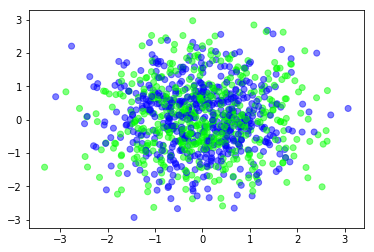

In [4]:
scatter(x[:,0], x[:,1], c=y, cmap=cm.brg, alpha=0.5)
xlabel(iris.feature_names[0]);
ylabel(iris.feature_names[1]);

## Gini Index formula
gini_index = sum(proportion * (1.0 - proportion))

gini_index = 1.0 - sum(proportion * proportion)

In [5]:
# Big-O(l*n)
def gini_index(groups_and_weights, labels):
    groups = groups_and_weights[0]
    weights = groups_and_weights[1]
    
    n = float(sum([(len(group)) for group in groups]))
    gini = 0.0
    
    for wt_idx, group in enumerate(groups):
        size = float(len(group))
        wt_of_group = sum([i for i in weights[wt_idx]])
        if size == 0:
            continue
        score = 0.0
        for label in labels:
            p = 0.0
            # Count the proportion of label in the given group
            for i, row in enumerate(group):
                if int(row[-1]) == int(label):
                    p += weights[wt_idx][i] * 1/wt_of_group
            score += p * p
        gini += (1.0 - score) * wt_of_group
    return gini

In [6]:
# Big-O(n)
def create_split(dataset, index, value, weight):
    left = []
    leftweight = []
    right = []
    rightweight = []
    for i, point in enumerate(dataset):
        if point[index] > value:
            right.append(point)
            rightweight.append(weight[i])
        else:
            left.append(point)
            leftweight.append(weight[i])
    return ((left, right), (leftweight, rightweight))

In [7]:
def find_best_split(dataset, weights):
    best_g, best_index, best_value = 9999, 9999, 9999
    for feature_index in range(len(dataset[0])-1):
        for row in dataset:
            g = (gini_index(create_split(dataset, feature_index, row[feature_index], weights),[0,1]))
            if best_g > g:
                best_index = feature_index
                best_value = row[feature_index]
                best_g = g
                
    return best_g, best_index, best_value

In [9]:
class DecisionTree():
    def __init__(self):
        self.index = None
        self.threshold = None
        self.index = None
        self.threshold = None
        self.gini_coeff = None

    # Big-O(l*n)
    def gini_index(self, groups_and_weights, labels):
        groups = groups_and_weights[0]
        weights = groups_and_weights[1]

        n = float(sum([(len(group)) for group in groups]))
        gini = 0.0

        for wt_idx, group in enumerate(groups):
            size = float(len(group))
            wt_of_group = sum([i for i in weights[wt_idx]])
            if size == 0:
                continue
            score = 0.0
            for label in labels:
                p = 0.0
                # Count the proportion of label in the given group
                for i, row in enumerate(group):
                    if int(row[-1]) == int(label):
                        p += weights[wt_idx][i] * 1/wt_of_group
                score += p * p
            gini += (1.0 - score) * wt_of_group
        return gini
    
    # Big-O(n)
    def create_split(self, dataset, index, value, weight):
        left = []
        leftweight = []
        right = []
        rightweight = []
        for i, point in enumerate(dataset):
            if point[index] > value:
                right.append(point)
                rightweight.append(weight[i])
            else:
                left.append(point)
                leftweight.append(weight[i])
        return ((left, right), (leftweight, rightweight))
    
    def fit(self, dataset, weights = None):
        if weights is None:
            weights = np.ones(len(dataset))/len(dataset)
        best_g, best_index, best_value = 9999, 9999, 9999
        labels = np.unique(dataset[:,2])
        for feature_index in range(len(dataset[0])-1):
            for row in dataset:
                left_right_split = self.create_split(dataset, feature_index, row[feature_index], weights)
                g = (self.gini_index(left_right_split, labels))
                if best_g > g:
                    best_split = left_right_split
                    best_index = feature_index
                    best_value = row[feature_index]
                    best_g = g
        left_best_split = best_split[0][0]
        right_best_split = best_split[0][1]
        print((left_best_split[-1]))
        
        # TODO add functionalty to add the sign to self
        # if x > y then positive or x < y then positive
        self.index = best_index
        self.threshold = best_value
        self.gini_coeff = best_g
        return best_g, best_index, best_value
    
    def predict(self, X, has_labels = True, weight = None):
        if weight is None:
            weights = np.ones(len(X))/len(X)
        if has_labels:
            x = XY[:,:-1]
        print(x[:, self.index] > self.threshold)

In [10]:
# github code

Text(0.5,1,'Original data')

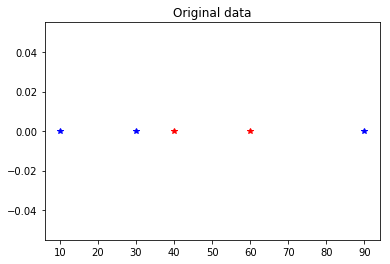

In [11]:
T = 3
dim = 1
N = 5

x = np.asarray([10,30,40,60,90]).reshape(-1,1)
label = np.asarray([1,1,0,0,1])

pos1 = np.nonzero(label == 1)
pos2 = np.where(label == 0)
label[pos2] = -1
# Plot the data

plt.figure()
plt.plot(x[pos1].flatten(),[0]*3,'b*')
plt.plot(x[pos2].flatten(),[0]*2,'r*')
plt.title("Original data")

In [12]:
x[pos1].flatten()

array([10, 30, 90])

In [162]:
temp = np.zeros(N, dtype=np.int64)


# Returns error and calculated labels corresponding to
def weakClassifier_error(i, j, k, x, weight, label):
                                                # threshold i
                                                # dimension j
                                                # sign k on dataset x.
                                                # Original labels are stored in
                                                # label

    temp_err = np.float64(0)
    # Initialise actual and expected labels to a perfect match( 0 = match , 1
    # = not a match)
    y = np.zeros(N, dtype=np.int64)

    if(k == 1):
        temp = (x[:, j] >= i)
    else:
        temp = (x[:, j] < i)

    temp = np.int64(temp)
    temp[np.where(temp == 0)] = -1
    y = np.int64(temp != label)
    # Calculate error of this weak classifier on the weighted dataset
    temp_err = np.sum(y * weight)

    return [temp_err, y]

In [163]:
threshold = [(x[i][0]+x[i+1][0])/2 for i in range(0,len(x)-1)]

In [164]:
threshold

[20.0, 35.0, 50.0, 75.0]

In [165]:
# Actual program begins

# h and alpha together completely specify the final strong classifier
h = np.zeros([T, 3], dtype=np.float64)
alpha = np.zeros(T, dtype=np.float64)

threshold = x

weight = np.ones(N, dtype=np.float64) / (N)  # Initialise weights

# Initially set error to infinity, to allow comparing with error of classifiers
err = np.ones(T, dtype=np.float64) * np.inf

for t in range(T):
    for i in threshold:
        for j in range(dim):
            for k in [-1, 1]:
                [tmpe, y] = weakClassifier_error(i, j, k, x, weight, label)
                if(tmpe < err[t]):  # storing the better classifier in h
                    err[t] = tmpe
                    y0 = y
                    h[t][0] = i
                    h[t][1] = int(j)
                    h[t][2] = int(k)

    if(err[t] > 0.5):
        T = t
        # We have run out of weak classifiers! So truncate the no: of
        # iterations used
        print(t, "Error!")
        break

    alpha[t] = 0.5 * np.log((1.0 - err[t]) / err[t])

    # y0=0 corresponded to correctly labelled datapoints. To reassign weights,
    y0[np.where(y0 == 0)] = -1
    # we need -1 and not 0 at these positions

    weight = np.float64(weight * np.exp(alpha[t] * y0))  # Reassign weights

    weight = weight / np.sum(weight)  # Normalise reassigned weights
    print(weight)

[0.125 0.125 0.125 0.125 0.5  ]
[0.08333333 0.08333333 0.25       0.25       0.33333333]
[0.25 0.25 0.15 0.15 0.2 ]


In [166]:
alpha

array([0.69314718, 0.54930614, 0.80471896])

In [167]:
h

array([[40.,  0., -1.],
       [10.,  0.,  1.],
       [90.,  0.,  1.]])

In [168]:
temp_sum = np.zeros(N, dtype=np.float64)
temp = np.zeros(N, dtype=np.float64)
final_label = np.zeros(N, dtype=np.float64)
misshits = np.zeros(T)

for t in range(T):  # Calculate final labels
    temp = h[t][2] * np.sign(x[:, int(h[t][1])] - h[t][0])
    temp_sum = np.float64(temp_sum + alpha[t] * temp)
    final_label = np.sign(temp_sum)
    misshits[t] = np.sum(np.float64(final_label != label)) / N


# Now plot the generated labels
pos1 = np.where(final_label == 1)
pos2 = np.where(final_label == -1)

plt.figure()
# plt.plot(x[pos1].flatten(), [0]*5, 'b*')
# plt.plot(x[pos2].flatten(), [0]*0, 'r*')
# plt.axis([-3, 3, -3, 3])
# plt.title("Generated data")
# plt.show()

# # Plot miss hits when more and more weak learners are used
# plt.figure()
# plt.plot(misshits)
# plt.ylabel('Miss hists')


In [169]:
print(final_label)

[-1.  1. -1. -1. -1.]


In [173]:
label

array([ 1,  1, -1, -1,  1])

In [170]:
x[:,int(h[t][1])]

array([10, 30, 40, 60, 90])

In [425]:
import sklearn.ensemble 
import graphviz
from  sklearn import tree


In [426]:
x,y = datasets.make_classification(n_samples=1000, n_features=200)
y[y==0]=-1
pd.DataFrame(x).to_csv('adaboost/mnist_data.csv',index=False,header=False)
pd.DataFrame(y).to_csv('adaboost/mnist_label.csv',index=False,header=False)

In [446]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,criterion = 'gini'),n_estimators=5)

In [456]:
clf.fit(x,y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=5, random_state=None)

In [460]:
clf.estimator_weights_

array([1., 1., 1., 1., 1.])

In [458]:
clf.estimator_weights_[1]

1.0

In [459]:
clf.estimator_errors_

array([0.104     , 0.32801084, 0.42529764, 0.38568781, 0.42939296])

In [461]:
clf.score(x,y)

0.892

In [452]:
clf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1865016938, splitter='best')

In [462]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None)
graph = graphviz.Source(dot_data) 

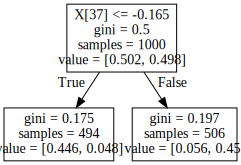

In [463]:
graph

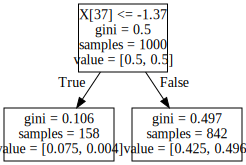

In [467]:
dot_data = tree.export_graphviz(clf.estimators_[4], out_file=None)
graph = graphviz.Source(dot_data)
graph

NameError: name 'estimators_' is not defined